In [1]:
"""
Installing required modules
"""

!pip install wordcloud
!pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
"""
Importing libs/packages
"""

import pandas as pd
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
"""
Mounting G-drive
"""

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls \drive/MyDrive/Airline_Sentiment_analysis/dataset

Usecase3_Customer_Sentiment_Dataset.csv


In [5]:
"""
Loading dataset for analysis
"""

df = pd.read_csv(r"/content/drive/MyDrive/Airline_Sentiment_analysis/dataset/Usecase3_Customer_Sentiment_Dataset.csv")

In [6]:
df.head(4)

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...


In [7]:
df.describe()

,airline_sentiment,airline,text
count,14640,14640,14640
unique,3,6,14427
top,negative,United,@united thanks
freq,9178,3822,6


In [8]:
"""
Count of tweets per Airline in dataframe
"""

df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

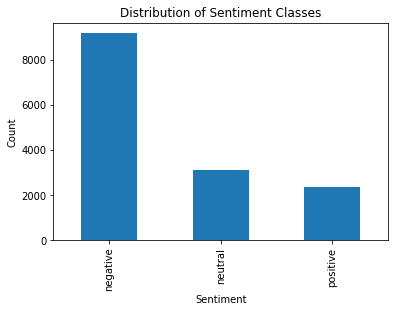

In [9]:
"""
Sentiment class distribution
"""

df['airline_sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [10]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [11]:
"""
Sentiment per airline
"""

df.groupby(['airline','airline_sentiment']).size()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64

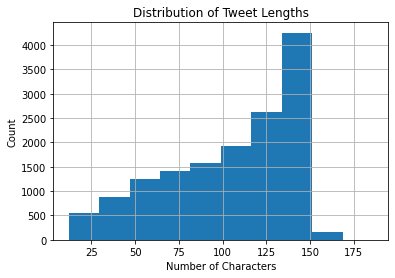

In [12]:
"""
Distribution of length of tweets
"""

df['text'].str.len().hist()
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()


In [13]:
df['Word_Count'] = df['text'].apply(lambda x: len(str(x).split()))

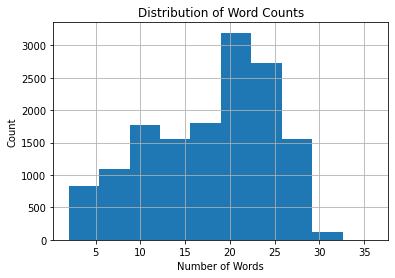

In [14]:
df['Word_Count'].hist()
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()


In [15]:
df['Hashtag_Count'] = df['text'].apply(lambda x: len([t for t in str(x).split() if t.startswith('#')]))

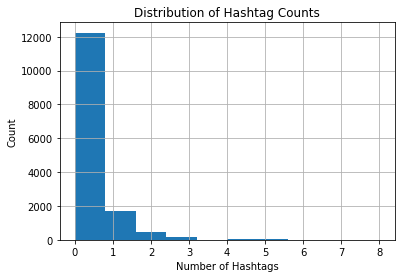

In [16]:
"""
#Hashtag per tweet
"""

df['Hashtag_Count'].hist()
plt.title('Distribution of Hashtag Counts')
plt.xlabel('Number of Hashtags')
plt.ylabel('Count')
plt.show()


In [17]:
df['Hashtag_Count'].value_counts()

0    12238
1     1705
2      437
3      145
4       76
5       27
6       10
7        1
8        1
Name: Hashtag_Count, dtype: int64

In [18]:
print(df[df['Hashtag_Count'] == 6]['text'])

1232     @United to start daily #B777-200ER flights fro...
3614     @united screwed over my professor. Maybe we sh...
5186     @SouthwestAir Great #BlackHistoryMonth commerc...
5394     @SouthwestAir Plz consider customers you're lo...
6754     @JetBlue 2 aisles of empty #evermoreroom seats...
8021     @JetBlue saving my sanity. Leaving it behind f...
8045     @JetBlue Let's just say #IDontWannaLiveWithout...
8111     Then you better #HoldOn - #EverythingsGonnaBeA...
8744     @JetBlue app just reminded me I will be flying...
10954    @USAirways #428 delayed due to #frozentoilet #...
Name: text, dtype: object


In [19]:
"""
Hashtag count - sentiment relationship
"""

df.groupby(['Hashtag_Count','airline_sentiment']).size()

Hashtag_Count  airline_sentiment
0              negative             7627
               neutral              2684
               positive             1927
1              negative             1133
               neutral               288
               positive              284
2              negative              286
               neutral                62
               positive               89
3              negative               79
               neutral                28
               positive               38
4              negative               40
               neutral                27
               positive                9
5              negative               10
               neutral                 6
               positive               11
6              negative                3
               neutral                 4
               positive                3
7              positive                1
8              positive                1
dtype: int64

In [20]:
"""
@Mentions distribution
"""

df['Mention_Count'] = df['text'].apply(lambda x: len([t for t in str(x).split() if t.startswith('@')]))

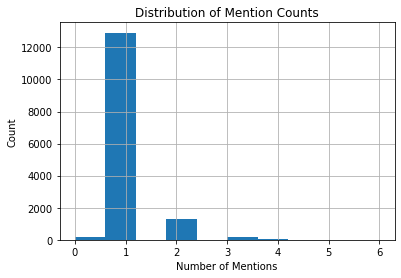

In [21]:
df['Mention_Count'].hist()
plt.title('Distribution of Mention Counts')
plt.xlabel('Number of Mentions')
plt.ylabel('Count')
plt.show()


In [22]:
df.Mention_Count.value_counts()

1    12914
2     1318
0      196
3      162
4       36
5       12
6        2
Name: Mention_Count, dtype: int64

In [23]:
"""
Word frequency in text column before cleaning/stopword removal
"""

word_freq = df['text'].str.split(expand=True).stack().value_counts()
word_freq

to               8535
the              5781
I                5054
a                4359
for              3921
                 ... 
Line.               1
business...so       1
fasten              1
$2,000              1
commitment??        1
Length: 30105, dtype: int64

In [24]:
"""
Tweet cleanup for EDA
"""

def tweet_preprocessor(tweet):
    # precprcess tweet
    tweet_words = []
    tweet = tweet.lower()

    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)

    tweet_proc = " ".join(tweet_words)
    return tweet_proc

In [25]:
df["processed_text_4_EDA"] = df.text.apply(lambda x: tweet_preprocessor(x))

In [26]:
stop_words.update(['@user', 'http'])

In [27]:
df['processed_text_4_EDA'] = df['processed_text_4_EDA'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [28]:
"""
Word frequency post clean-up - Focussed
"""

word_freq = df['processed_text_4_EDA'].str.split(expand=True).stack().value_counts()
word_freq

flight                 3217
get                    1329
cancelled              1047
customer                707
thanks                  705
                       ... 
#boss                     1
consistent,               1
mom!                      1
#ichangedyourdiaper       1
commitment??              1
Length: 24560, dtype: int64

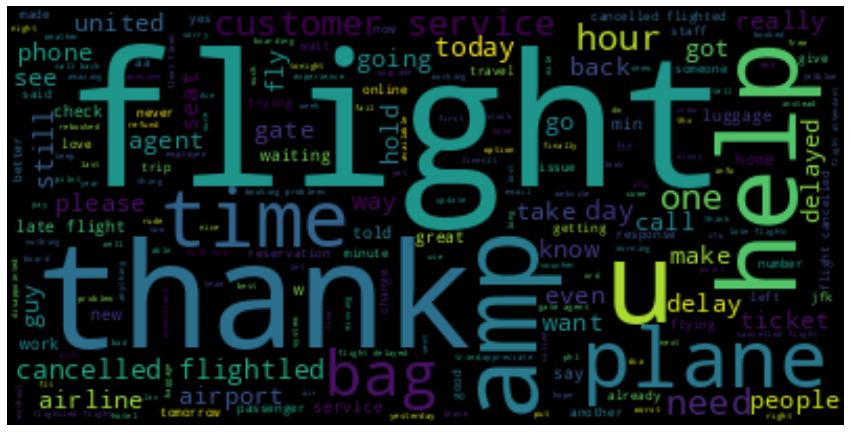

In [30]:
"""
Wordcloud - frequency graph
"""

common_words=''
for i in df.processed_text_4_EDA:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud().generate(common_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

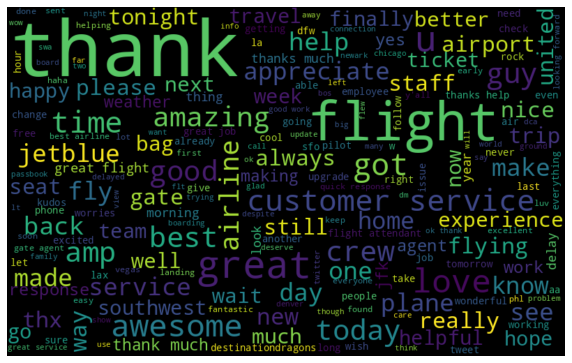

In [31]:
# Positive word cloud

positive_tweets = df[df['airline_sentiment'] == 'positive']
positive_words = ' '.join([tweet for tweet in positive_tweets['processed_text_4_EDA']])
positive_wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

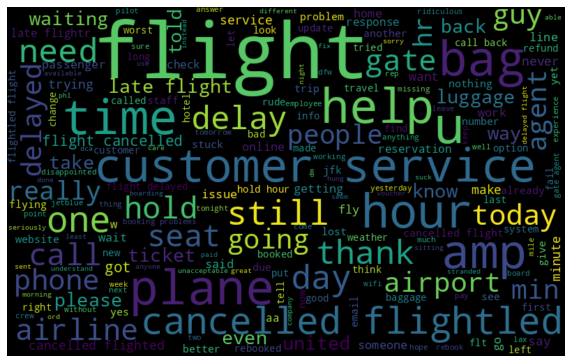

In [32]:
# Negative word cloud

negative_tweets = df[df['airline_sentiment'] == 'negative']
negative_words = ' '.join([tweet for tweet in negative_tweets['processed_text_4_EDA']])
negative_wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

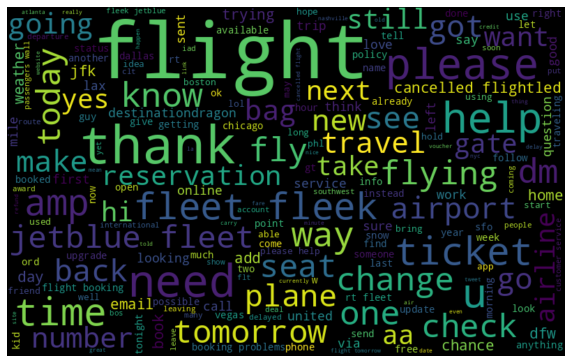

In [40]:
# Negative word cloud

negative_tweets = df[df['airline_sentiment'] == 'neutral']
negative_words = ' '.join([tweet for tweet in negative_tweets['processed_text_4_EDA']])
negative_wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [33]:
"""
A check on how thank is coming frequently in negative sentiment texts
"""

df[(df['text'].str.contains("thank")) & (df['airline_sentiment'] == 'negative')]

,airline_sentiment,airline,text,Word_Count,Hashtag_Count,Mention_Count,processed_text_4_EDA
219,negative,Virgin America,@VirginAmerica I did it but there was a proble...,18,0,1,problem link email check-in. thanks
545,negative,United,"@united yes, we've been with the agents for th...",26,0,1,"yes, we've agents last 50 minutes. one agents ..."
727,negative,United,@united thanks United I understand that. But h...,26,0,1,thanks united understand that. would actually ...
811,negative,United,@united thanks for effing up our holidays - we...,23,0,2,thanks effing holidays - we're missing full da...
1048,negative,United,"@united Ok thank you, do you provide complimen...",16,0,1,"ok thank you, provide complimentary hotel acco..."
...,...,...,...,...,...,...,...
14162,negative,American,@AmericanAir my husband and 5 year old son stu...,24,0,1,husband 5 year old son stuck overnight dc than...
14182,negative,American,@AmericanAir you put a sour taste on this cust...,22,0,1,put sour taste customer’s vacation. joke watch...
14299,negative,American,"As am I, @AmericanAir - but thankfully there w...",21,0,2,"i, - thankfully lounge next door. really impre..."
14515,negative,American,@AmericanAir thanks for the response. I know i...,26,0,1,thanks response. know fault... im ord t5 hungr...


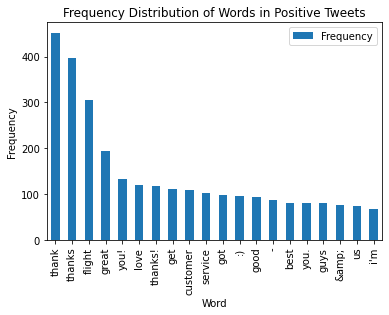

In [34]:
from collections import Counter

# Positive word frequency distribution

positive_tweets = df[df['airline_sentiment'] == 'positive']
positive_words = ' '.join([tweet for tweet in positive_tweets['processed_text_4_EDA']])
positive_word_freq = Counter(positive_words.split())
positive_word_freq_df = pd.DataFrame(list(positive_word_freq.items()), columns=['Word', 'Frequency'])
positive_word_freq_df = positive_word_freq_df.sort_values(by='Frequency', ascending=False).head(20)
positive_word_freq_df.plot(kind='bar', x='Word', y='Frequency')
plt.title('Frequency Distribution of Words in Positive Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

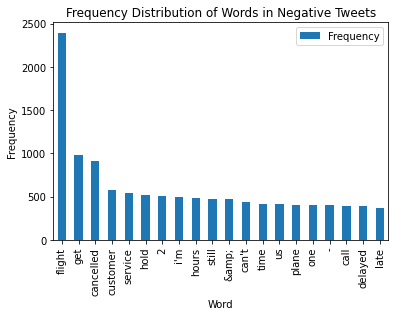

In [35]:
# Negative word frequency distribution

negative_tweets = df[df['airline_sentiment'] == 'negative']
negative_words = ' '.join([tweet for tweet in negative_tweets['processed_text_4_EDA']])
negative_word_freq = Counter(negative_words.split())
negative_word_freq_df = pd.DataFrame(list(negative_word_freq.items()), columns=['Word', 'Frequency'])
negative_word_freq_df = negative_word_freq_df.sort_values(by='Frequency', ascending=False).head(20)
negative_word_freq_df.plot(kind='bar', x='Word', y='Frequency')
plt.title('Frequency Distribution of Words in Negative Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

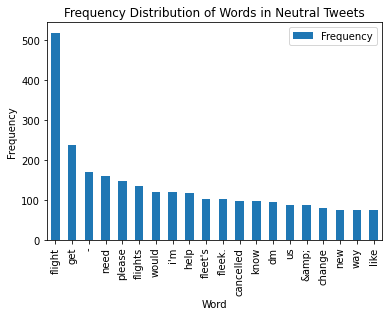

In [36]:
# Neutral word frequency distribution

neutral_tweets = df[df['airline_sentiment'] == 'neutral']
neutral_words = ' '.join([tweet for tweet in neutral_tweets['processed_text_4_EDA']])
neutral_word_freq = Counter(neutral_words.split())
neutral_word_freq_df = pd.DataFrame(list(neutral_word_freq.items()), columns=['Word', 'Frequency'])
neutral_word_freq_df = neutral_word_freq_df.sort_values(by='Frequency', ascending=False).head(20)
neutral_word_freq_df.plot(kind='bar', x='Word', y='Frequency')
plt.title('Frequency Distribution of Words in Neutral Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [37]:
"""
Naive bayes based sentiment check on data
"""

from textblob import TextBlob
df['polarity'] = df['processed_text_4_EDA'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,airline_sentiment,airline,text,Word_Count,Hashtag_Count,Mention_Count,processed_text_4_EDA,polarity
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,4,0,2,said.,0.000000
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,9,0,1,plus added commercials experience... tacky.,0.000000
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,12,0,1,today... must mean need take another trip!,-0.390625
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,17,0,1,"really aggressive blast obnoxious ""entertainme...",0.006250
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,10,0,1,really big bad thing,-0.350000


In [38]:
df.sort_values('polarity')

,airline_sentiment,airline,text,Word_Count,Hashtag_Count,Mention_Count,processed_text_4_EDA,polarity
13587,negative,American,@AmericanAir not only did you Cancelled Flight...,27,0,1,"cancelled flight flight jfk delay us 29 hours,...",-1.0
14172,negative,American,@AmericanAir pathetic to have your gate agents...,16,0,1,pathetic gate agents lie face fault,-1.0
4932,negative,Southwest,@SouthwestAir you guys should stop doing servi...,22,0,1,guys stop service denver horrible get stuck ev...,-1.0
7924,negative,Delta,@JetBlue appreciate the response Worst part is...,23,0,1,appreciate response worst part losing non refu...,-1.0
10346,negative,US Airways,"@USAirways My wife, sick 3yr-old-twins, and I ...",25,0,1,"wife, sick 3yr-old-twins, waiting line 2hrs se...",-1.0
...,...,...,...,...,...,...,...,...
14470,negative,American,@AmericanAir that's quite an impressive list o...,8,0,1,that's quite impressive list fees!,1.0
8817,positive,Delta,@JetBlue @ProfessorpaUL15 Always happy to help!,6,0,2,always happy help!,1.0
8816,positive,Delta,@JetBlue so happy you can accommodate peanut/t...,16,0,1,happy accommodate peanut/treenut allergies fli...,1.0
7294,positive,Delta,@JetBlue awesome,2,0,1,awesome,1.0


In [39]:
df.to_csv(r"/content/drive/MyDrive/Airline_Sentiment_analysis/dataset/Usecase3_Customer_Sentiment_Dataset_Analysed.csv")